<a href="https://www.kaggle.com/code/mampihemram/online-food?scriptVersionId=166963111" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split# data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/online-food-dataset/onlinefoods.csv


In [2]:
df = pd.read_csv("/kaggle/input/online-food-dataset/onlinefoods.csv")
df.head()

,Age,Gender,Marital Status,Occupation,Monthly Income,Educational Qualifications,Family size,latitude,longitude,Pin code,Output,Feedback,Unnamed: 12
0,20,Female,Single,Student,No Income,Post Graduate,4,12.9766,77.5993,560001,Yes,Positive,Yes
1,24,Female,Single,Student,Below Rs.10000,Graduate,3,12.9770,77.5773,560009,Yes,Positive,Yes
2,22,Male,Single,Student,Below Rs.10000,Post Graduate,3,12.9551,77.6593,560017,Yes,Negative,Yes
3,22,Female,Single,Student,No Income,Graduate,6,12.9473,77.5616,560019,Yes,Positive,Yes
4,22,Male,Single,Student,Below Rs.10000,Post Graduate,4,12.9850,77.5533,560010,Yes,Positive,Yes


In [3]:
df.tail()

,Age,Gender,Marital Status,Occupation,Monthly Income,Educational Qualifications,Family size,latitude,longitude,Pin code,Output,Feedback,Unnamed: 12
383,23,Female,Single,Student,No Income,Post Graduate,2,12.9766,77.5993,560001,Yes,Positive,Yes
384,23,Female,Single,Student,No Income,Post Graduate,4,12.9854,77.7081,560048,Yes,Positive,Yes
385,22,Female,Single,Student,No Income,Post Graduate,5,12.9850,77.5533,560010,Yes,Positive,Yes
386,23,Male,Single,Student,Below Rs.10000,Post Graduate,2,12.9770,77.5773,560009,Yes,Positive,Yes
387,23,Male,Single,Student,No Income,Post Graduate,5,12.8988,77.5764,560078,Yes,Positive,Yes


In [4]:
df.shape

(388, 13)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 388 entries, 0 to 387
Data columns (total 13 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Age                         388 non-null    int64  
 1   Gender                      388 non-null    object 
 2   Marital Status              388 non-null    object 
 3   Occupation                  388 non-null    object 
 4   Monthly Income              388 non-null    object 
 5   Educational Qualifications  388 non-null    object 
 6   Family size                 388 non-null    int64  
 7   latitude                    388 non-null    float64
 8   longitude                   388 non-null    float64
 9   Pin code                    388 non-null    int64  
 10  Output                      388 non-null    object 
 11  Feedback                    388 non-null    object 
 12  Unnamed: 12                 388 non-null    object 
dtypes: float64(2), int64(3), object(8)


In [6]:
df.describe()

,Age,Family size,latitude,longitude,Pin code
count,388.000000,388.000000,388.000000,388.000000,388.000000
mean,24.628866,3.280928,12.972058,77.600160,560040.113402
std,2.975593,1.351025,0.044489,0.051354,31.399609
min,18.000000,1.000000,12.865200,77.484200,560001.000000
25%,23.000000,2.000000,12.936900,77.565275,560010.750000
50%,24.000000,3.000000,12.977000,77.592100,560033.500000
75%,26.000000,4.000000,12.997025,77.630900,560068.000000
max,33.000000,6.000000,13.102000,77.758200,560109.000000


In [7]:
df.columns

Index(['Age', 'Gender', 'Marital Status', 'Occupation', 'Monthly Income',
       'Educational Qualifications', 'Family size', 'latitude', 'longitude',
       'Pin code', 'Output', 'Feedback', 'Unnamed: 12'],
      dtype='object')

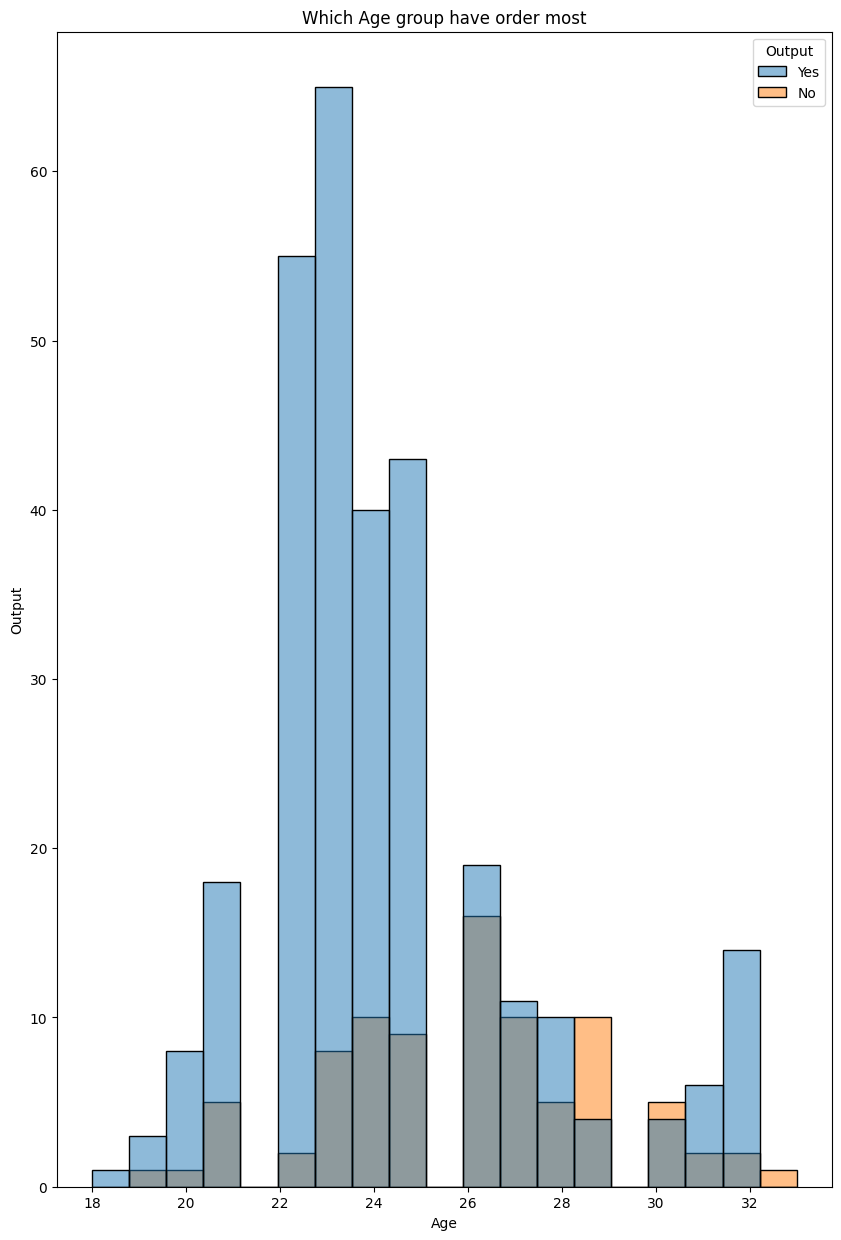

In [8]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

plt.figure(figsize=(10,15))
sns.histplot(data=df, x='Age',hue="Output", color='skyblue')
plt.ylabel('Output')
plt.xlabel('Age')
plt.title("Which Age group have order most");
plt.show()

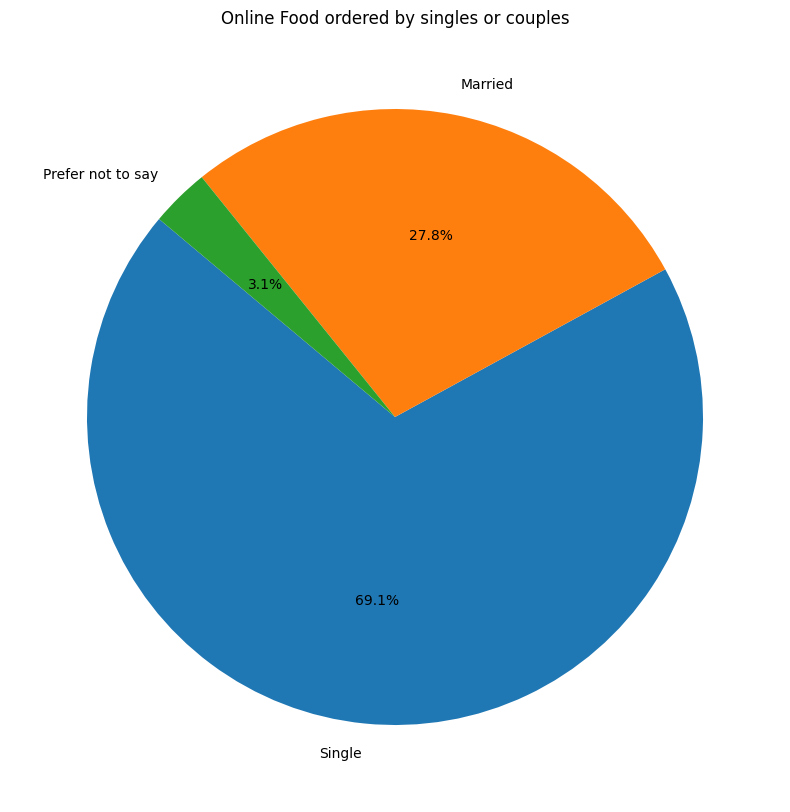

In [9]:
counts = df['Marital Status'].value_counts()
plt.figure(figsize=(10,10))
plt.pie(counts, labels=counts.index, autopct='%1.1f%%', startangle=140)
plt.title("Online Food ordered by singles or couples");
plt.show()

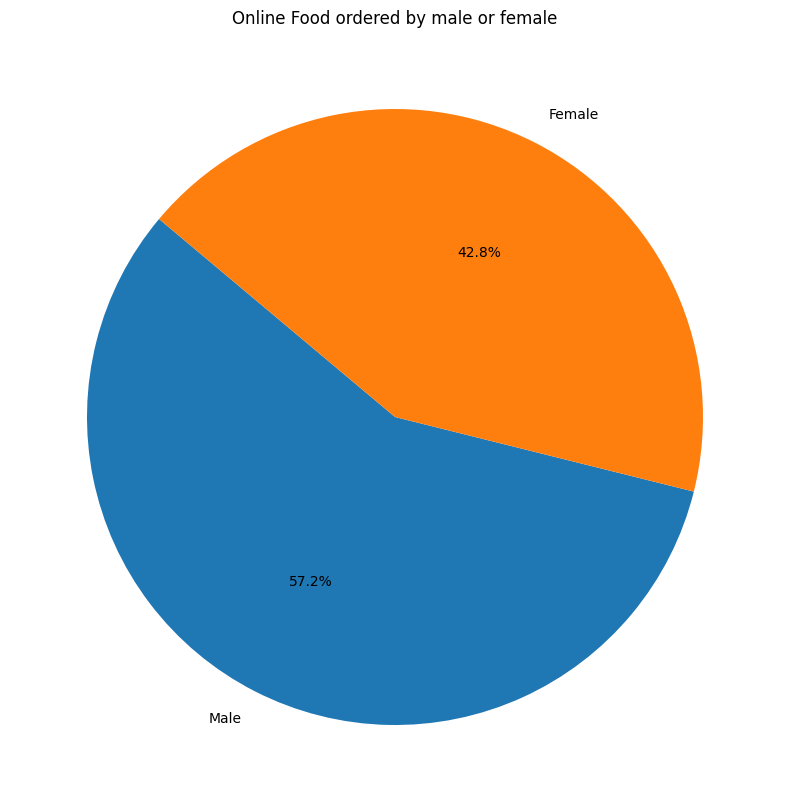

In [10]:
counts_gender = df['Gender'].value_counts()
plt.figure(figsize=(10,10))
plt.pie(counts_gender, labels=counts_gender.index, autopct='%1.1f%%', startangle=140)
plt.title("Online Food ordered by male or female");
plt.show()

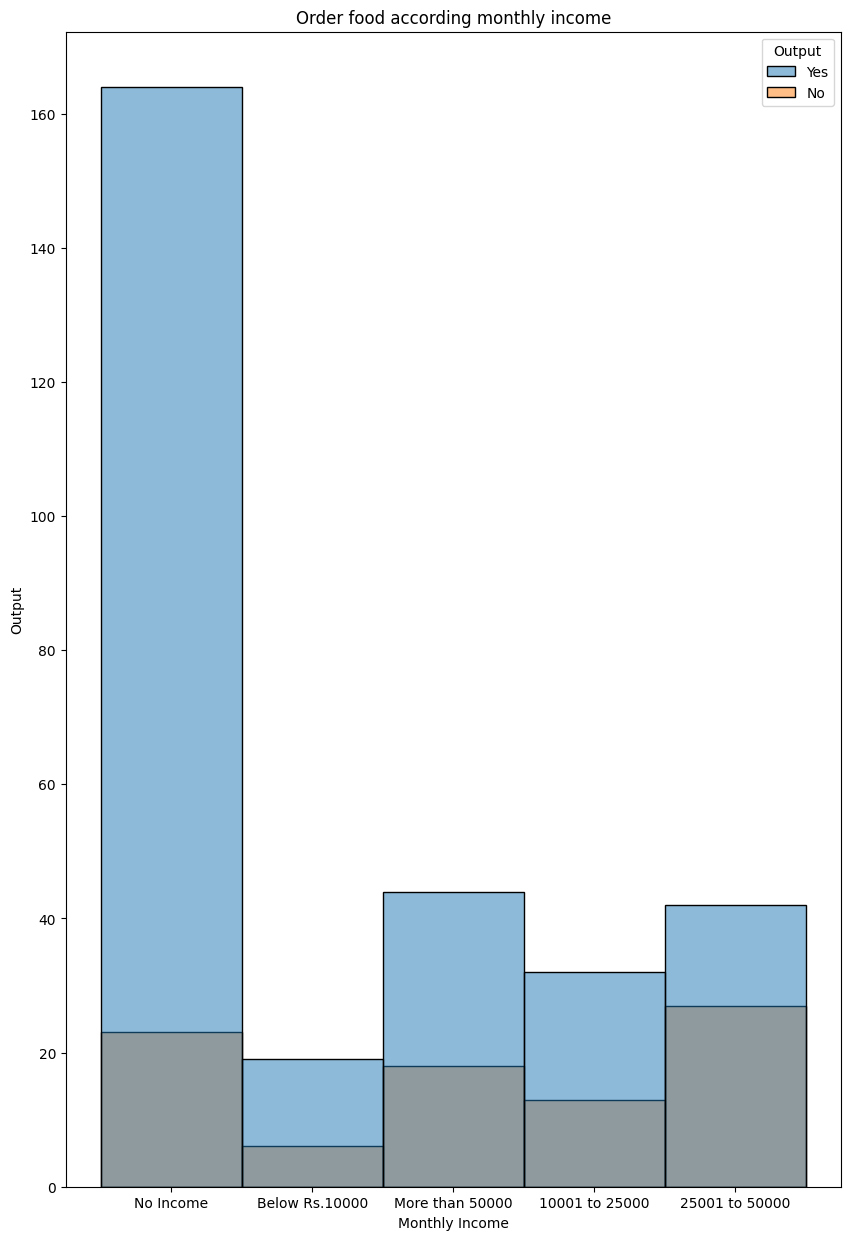

In [11]:
plt.figure(figsize=(10,15))
sns.histplot(data=df, x='Monthly Income',hue="Output", color='skyblue')
plt.ylabel('Output')
plt.xlabel('Monthly Income')
plt.title("Order food according monthly income");
plt.show()

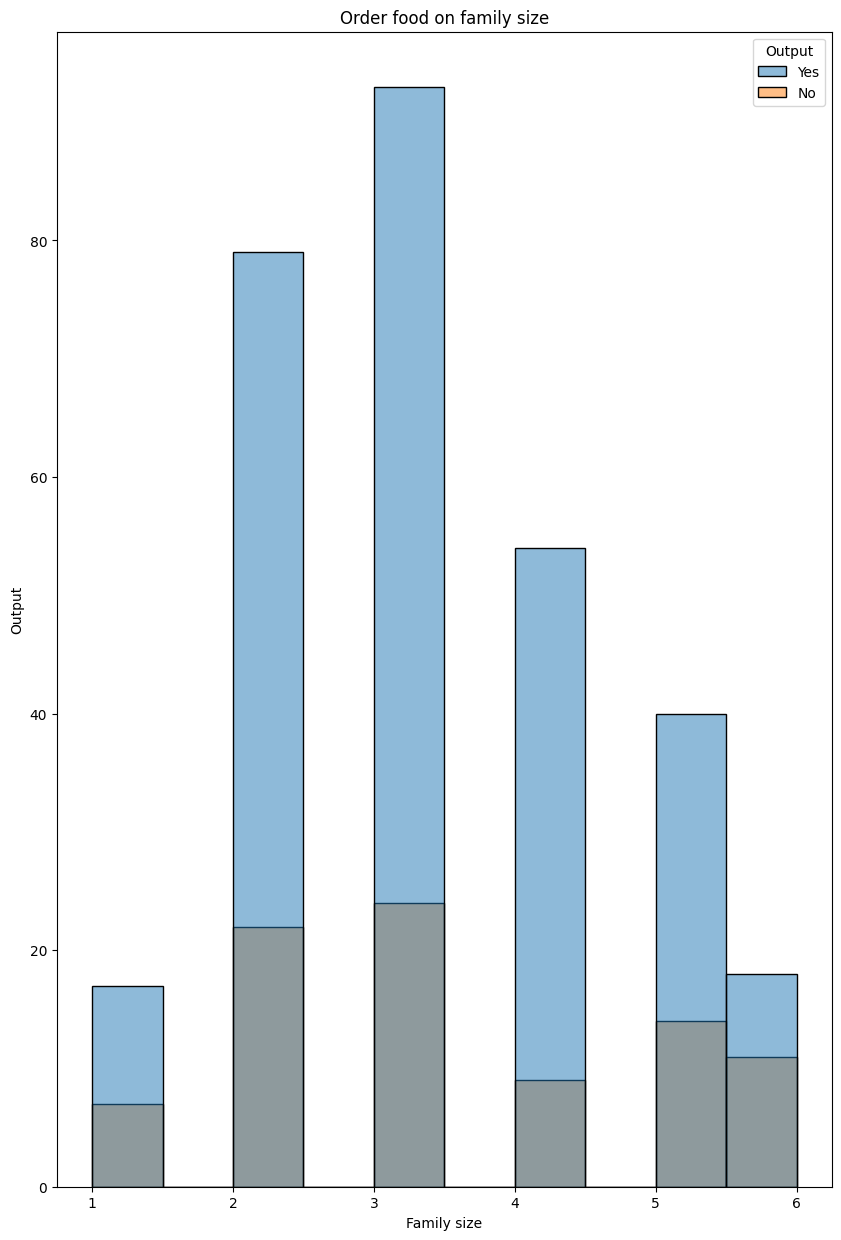

In [12]:
plt.figure(figsize=(10,15))
sns.histplot(data=df, x='Family size',hue="Output", color='skyblue')
plt.ylabel('Output')
plt.xlabel('Family size')
plt.title("Order food on family size");
plt.show()

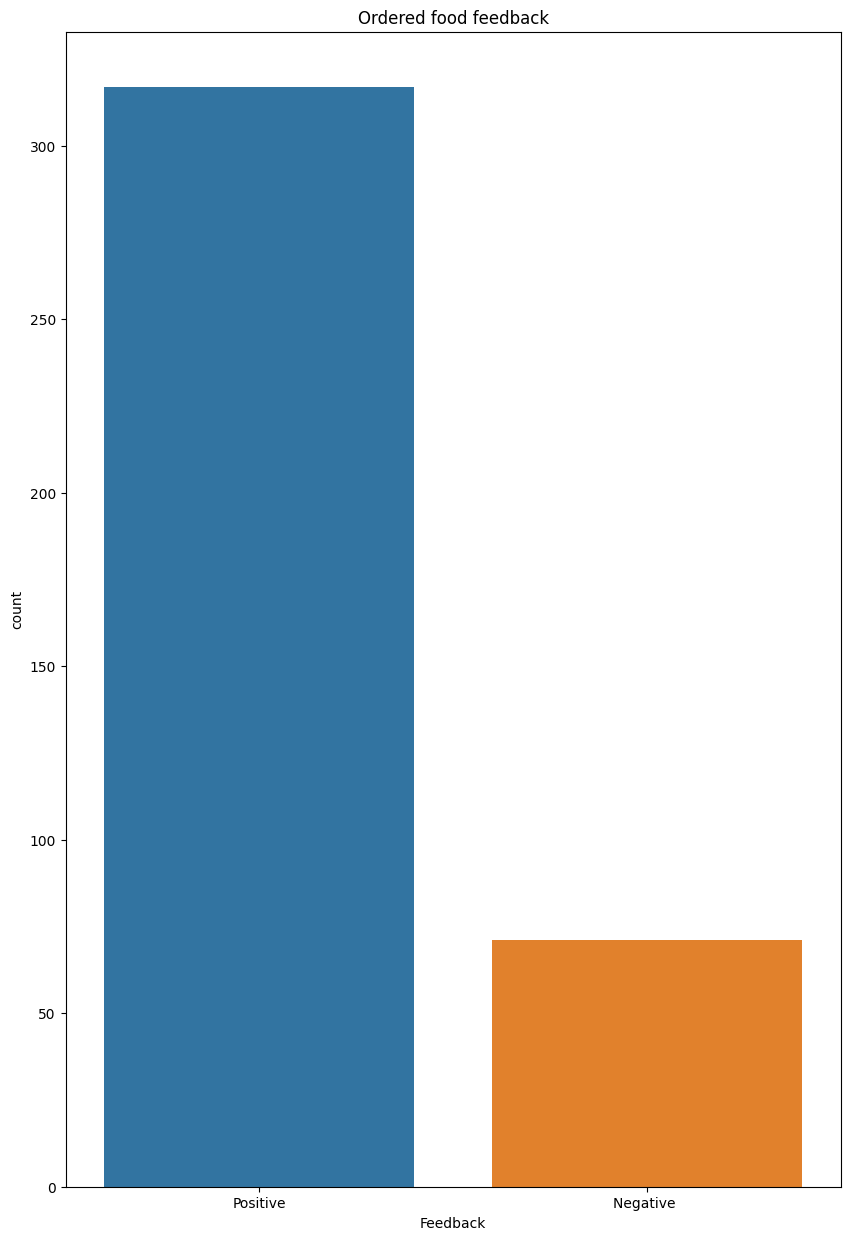

In [13]:
count = df['Feedback'].value_counts()
plt.figure(figsize=(10,15))
sns.barplot( x=count.index,y=count.values)
plt.ylabel('count')
plt.xlabel('Feedback')
plt.title("Ordered food feedback");
plt.show()

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 388 entries, 0 to 387
Data columns (total 13 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Age                         388 non-null    int64  
 1   Gender                      388 non-null    object 
 2   Marital Status              388 non-null    object 
 3   Occupation                  388 non-null    object 
 4   Monthly Income              388 non-null    object 
 5   Educational Qualifications  388 non-null    object 
 6   Family size                 388 non-null    int64  
 7   latitude                    388 non-null    float64
 8   longitude                   388 non-null    float64
 9   Pin code                    388 non-null    int64  
 10  Output                      388 non-null    object 
 11  Feedback                    388 non-null    object 
 12  Unnamed: 12                 388 non-null    object 
dtypes: float64(2), int64(3), object(8)


In [15]:
df = df.drop(labels = "Unnamed: 12", axis=1)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 388 entries, 0 to 387
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Age                         388 non-null    int64  
 1   Gender                      388 non-null    object 
 2   Marital Status              388 non-null    object 
 3   Occupation                  388 non-null    object 
 4   Monthly Income              388 non-null    object 
 5   Educational Qualifications  388 non-null    object 
 6   Family size                 388 non-null    int64  
 7   latitude                    388 non-null    float64
 8   longitude                   388 non-null    float64
 9   Pin code                    388 non-null    int64  
 10  Output                      388 non-null    object 
 11  Feedback                    388 non-null    object 
dtypes: float64(2), int64(3), object(7)
memory usage: 36.5+ KB


In [16]:
print("Gender count: ",df["Gender"].value_counts())
print("------------------")
print("Marital Status count: ",df["Marital Status"].value_counts())
print("------------------")
print("Monthly Income: ",df["Monthly Income"].value_counts())
print("------------------")
print("Family size count: ",df["Family size"].value_counts())
print("------------------")
print("Outputcount: ",df["Output"].value_counts())
print("------------------")
print("Feedback count: ",df["Feedback"].value_counts())
print("------------------")

Gender count:  Gender
Male      222
Female    166
Name: count, dtype: int64
------------------
Marital Status count:  Marital Status
Single               268
Married              108
Prefer not to say     12
Name: count, dtype: int64
------------------
Monthly Income:  Monthly Income
No Income          187
25001 to 50000      69
More than 50000     62
10001 to 25000      45
Below Rs.10000      25
Name: count, dtype: int64
------------------
Family size count:  Family size
3    117
2    101
4     63
5     54
6     29
1     24
Name: count, dtype: int64
------------------
Outputcount:  Output
Yes    301
No      87
Name: count, dtype: int64
------------------
Feedback count:  Feedback
Positive     317
Negative      71
Name: count, dtype: int64
------------------


In [17]:
print(df["Feedback"].dtype)
df["Feedback"] =  df["Feedback"].astype(str)

object


In [18]:
print(df["Gender"].unique())
print(df["Marital Status"].unique())
print(df["Monthly Income"].unique())
print(df["Output"].unique())
print(df["Feedback"].unique())

['Female' 'Male']
['Single' 'Married' 'Prefer not to say']
['No Income' 'Below Rs.10000' 'More than 50000' '10001 to 25000'
 '25001 to 50000']
['Yes' 'No']
['Positive' 'Negative ']


In [19]:
df['Gender'] = df["Gender"].map({"Male": 1, "Female": 0})
df['Marital Status'] = df['Marital Status'].map({'Prefer not to say': 0, 'Single': 1, 'Married': 2})
df['Occupation'] = df['Occupation'].map({"Student": 1, "Employee": 2, "Self Employeed": 3, "House wife": 4})
df["Educational Qualifications"] = df["Educational Qualifications"].map({"Graduate": 1, "Post Graduate": 2, "Ph.D": 3, "School": 4, "Uneducated": 5})
df["Monthly Income"] = df["Monthly Income"].map({"No Income": 0, "25001 to 50000": 5000, "More than 50000": 7000, "10001 to 25000": 25000, "Below Rs.10000": 10000})
df["Feedback"] = df["Feedback"].map({"Positive": 1, "Negative ": 0})

In [20]:
df.head()

,Age,Gender,Marital Status,Occupation,Monthly Income,Educational Qualifications,Family size,latitude,longitude,Pin code,Output,Feedback
0,20,0,1,1,0,2,4,12.9766,77.5993,560001,Yes,1
1,24,0,1,1,10000,1,3,12.9770,77.5773,560009,Yes,1
2,22,1,1,1,10000,2,3,12.9551,77.6593,560017,Yes,0
3,22,0,1,1,0,1,6,12.9473,77.5616,560019,Yes,1
4,22,1,1,1,10000,2,4,12.9850,77.5533,560010,Yes,1


In [21]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

In [22]:
x = df[['Age', 'Gender', 'Marital Status', 'Occupation', 'Monthly Income',
       'Educational Qualifications', 'Family size', 'latitude', 'longitude',
       'Pin code', 'Feedback']]
y = df["Output"]

In [23]:
x_train, x_test, y_train, y_test = train_test_split(x,y, random_state = 1, test_size = 0.2)

In [24]:
print(f"x_train:{x_train.shape}")
print(f"x_test:{x_test.shape}")
print(f"y_train:{y_train.shape}")
print(f"y_test:{y_test.shape}")

x_train:(310, 11)
x_test:(78, 11)
y_train:(310,)
y_test:(78,)


In [25]:
clf = RandomForestClassifier(n_estimators=20) 
clf.fit(x_train,y_train)

RandomForestClassifier(n_estimators=20)

In [26]:
y_train_pred_count1 = clf.predict(x_train)
y_test_pred_count1 = clf.predict(x_test)

In [27]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score

In [28]:
accuracy_train = accuracy_score(y_train,y_train_pred_count1)
print(f"train accuracy:{accuracy_train}")
accuracy_test = accuracy_score(y_test,y_test_pred_count1)
print(f"test accuracy:{accuracy_test}")

train accuracy:0.9967741935483871
test accuracy:0.8333333333333334
